<a href="https://colab.research.google.com/github/adarshanand2327/Digit_Recognizer/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.MNIST('MNIST_data/', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST('MNIST_data/', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:02, 3918718.91it/s]                             


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58238.08it/s]                           
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 976763.45it/s]                             
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21712.37it/s]            

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
dataIter = iter(trainloader)
images, labels = dataIter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(1)


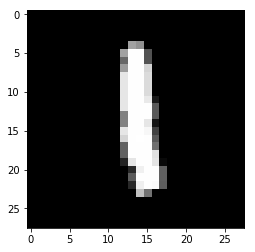

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')
print(labels[1])

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x))

input = images.view(images.shape[0], 784)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h1 = activation(torch.mm(input, w1)+ b1)
output = activation(torch.mm(h1, w2) + b2)
final = softmax(output)

In [6]:
print(output)

tensor([[9.6746e-01, 3.5283e-03, 6.5076e-01, 4.0305e-03, 1.0000e+00, 9.9984e-01,
         6.9548e-02, 1.3046e-03, 6.5271e-03, 9.9299e-01],
        [4.8937e-02, 9.1439e-01, 9.6750e-01, 8.4181e-01, 1.0000e+00, 9.9978e-01,
         2.1468e-03, 2.4613e-02, 8.7345e-04, 9.9975e-01],
        [8.4335e-01, 9.6826e-01, 9.9974e-01, 6.4972e-03, 1.0000e+00, 9.9904e-01,
         1.8147e-04, 9.1311e-06, 5.8273e-03, 9.9997e-01],
        [2.2849e-01, 9.7540e-01, 1.0000e+00, 6.5074e-01, 1.0000e+00, 9.8749e-01,
         2.2684e-04, 8.1573e-06, 7.7573e-03, 9.9652e-01],
        [3.2479e-01, 1.0990e-01, 9.6206e-01, 4.9619e-03, 1.0000e+00, 9.9795e-01,
         1.6699e-06, 9.1671e-03, 2.2388e-03, 9.9999e-01],
        [9.9581e-01, 8.7552e-01, 9.9979e-01, 2.2023e-03, 1.0000e+00, 9.9903e-01,
         9.3793e-01, 9.9769e-01, 2.6277e-02, 9.8965e-01],
        [2.3466e-03, 1.6845e-01, 9.9911e-01, 5.4571e-03, 1.0000e+00, 1.0000e+00,
         9.9818e-01, 9.7218e-02, 4.2019e-02, 9.9869e-01],
        [2.3809e-03, 9.9999

In [0]:
import torch.nn.functional as F
from torch import nn
from torch import optim

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden1 = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [9]:
model1 = Classifier()
model1

Classifier(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images, labels = iter(trainloader).next()
images = images.view(images.shape[0], -1)
prediction = model(images)
loss = criterion(prediction, labels)
optimizer = optim.SGD(model.parameters(), lr=0.003)
print(model)
print(model.state_dict().keys())

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])


In [16]:
epochs = 20
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    prediction = model.forward(images)
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f"training loss: {running_loss/len(trainloader)}")
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
      images = images.view(images.shape[0], -1)
      outputs = model(images)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    print(correct/total)

training loss: 0.23779570808542816
0.9318
training loss: 0.23283250642213613
0.9348
training loss: 0.22778911406456281
0.9334
training loss: 0.2229902592580964
0.9354
training loss: 0.21839798519860454
0.939
training loss: 0.21343930158565547
0.9393
training loss: 0.2091581449309773
0.9399
training loss: 0.20432010540432893
0.9374
training loss: 0.1999247055858183
0.9425
training loss: 0.19561521175192365
0.9425
training loss: 0.1914589295008861
0.9437
training loss: 0.18713130083070126
0.9448
training loss: 0.18329561419530846
0.9463
training loss: 0.17941379937520033
0.9454
training loss: 0.17560796293892714
0.9481
training loss: 0.17199897533381925
0.9481
training loss: 0.16833393851211712
0.9484
training loss: 0.164773072884567
0.9508
training loss: 0.16167052265709397
0.9496
training loss: 0.1583564058541934
0.9519
